This code imports four important Python libraries that make working with data much easier. Pandas (pd) helps you manage and analyze data like a spreadsheet, NumPy (np) handles numbers and calculations, Matplotlib (plt) lets you draw simple graphs, and Seaborn (sns) makes those graphs look more stylish and clear. Altogether, they help you explore and understand data in a simple and visual way.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


import data set

In [6]:
df = pd.read_csv(r'/workspaces/CS_Group_09_Salary_prediction/data/Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


drop null values

In [7]:
df = df[['Age', 'Gender', 'Job Title', 'Education Level', 'Years of Experience', 'Salary']].dropna()

df.shape simply shows the size of your dataset, telling you how many entries (rows) it has and how many details (columns) each entry includes.

In [8]:
df.shape

(6698, 6)

shows how many rows and columns it has

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Job Title            6698 non-null   object 
 3   Education Level      6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


gives a quick summary of the numerical columns in your dataset.

In [10]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


shows the first five rows of these selected columns so you can quickly see their data.

In [11]:
x=df.iloc[:,1:5]
x.head()

,Gender,Job Title,Education Level,Years of Experience
0,Male,Software Engineer,Bachelor's,5.0
1,Female,Data Analyst,Master's,3.0
2,Male,Senior Manager,PhD,15.0
3,Female,Sales Associate,Bachelor's,7.0
4,Male,Director,Master's,20.0


This code picks the last column (like Salary) and stores it in y, then shows the first five values.

In [12]:
y=df.iloc[:,-1]
y.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

is used to make all numbers in your data have a similar scale.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

shows the first 5 scaled salary values.

In [14]:
x = df[['Salary']]  
x = scaler.fit_transform(x)
x[0:5]

array([[-0.47984928],
       [-0.95346104],
       [ 0.65681894],
       [-1.04818339],
       [ 1.60404245]])

plits your data into 2 parts,training set and testing set

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

shows the size of the training data ,how many rows and columns are in x_train

In [16]:
x_train.shape

(5358, 1)

This shows how many rows and columns are in your test data.

In [17]:
x_test.shape

(1340, 1)

This code checks if the training data has any empty values.

In [18]:
x_train = pd.DataFrame(x_train)
print(x_train.isnull().sum())

0    0
dtype: int64


shows all the column name in  dataset

In [19]:
print(df.columns)

Index(['Age', 'Gender', 'Job Title', 'Education Level', 'Years of Experience',
       'Salary'],
      dtype='object')


creating a KNN model and training it to learn from your data.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


The model makes predictions using x_test,and
 shows the first 5 predicted results

In [21]:
pred = model.predict(x_test)
pred[0:5]

array([195000., 110000., 140000., 170000.,  65000.])

check the accuracy

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
accuracy

0.9641791044776119

crossvalidation part,checks the model again and again to make sure the accuracy is reliable, then shows the average accuracy.

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_test, y_test, cv=5)
print("Average accuracy:", scores.mean())


Average accuracy: 0.9201492537313433


/opt/conda/envs/ml-env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [24]:
correct_sum = [] 
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    correct = np.sum(pred == y_test)
    correct_sum.append(correct)

In [25]:
correct_sum

[np.int64(1292),
 np.int64(1266),
 np.int64(1249),
 np.int64(1242),
 np.int64(1235),
 np.int64(1225),
 np.int64(1220),
 np.int64(1211),
 np.int64(1205),
 np.int64(1202),
 np.int64(1201),
 np.int64(1199),
 np.int64(1197),
 np.int64(1194),
 np.int64(1189),
 np.int64(1189),
 np.int64(1189),
 np.int64(1186),
 np.int64(1183)]

In [26]:
result = pd.DataFrame(data=correct_sum)
result.index = result.index+1
result.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1292,1266,1249,1242,1235,1225,1220,1211,1205,1202,1201,1199,1197,1194,1189,1189,1189,1186,1183


In [27]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [28]:
accuracy_score(y_test,pred)

0.9641791044776119

In [30]:
# KNN Regression Model
model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)

# Predict on Train and Test data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate R2 Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train R² Score:", train_r2)
print("Test R² Score:", test_r2)


Train R² Score: 0.9999995204761579
Test R² Score: 0.9999958242718623


Train R² Score: 0.9999995204761579
Test R² Score: 0.9999958242718623


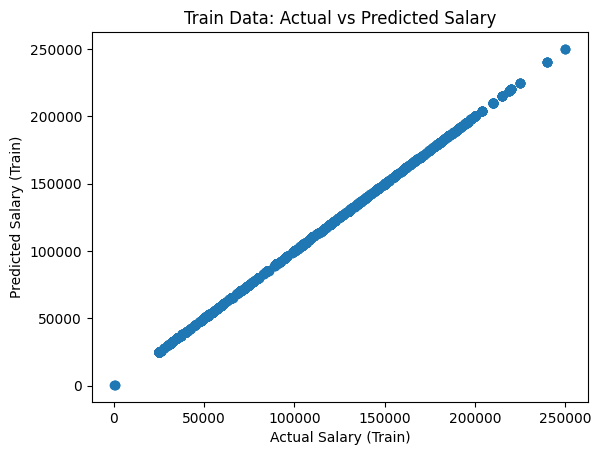

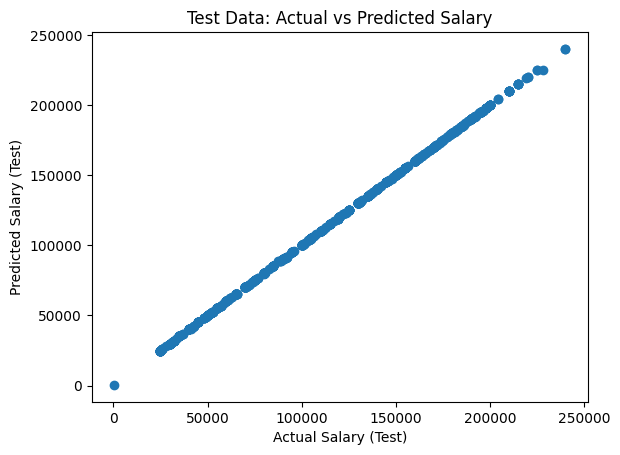

In [31]:
# Train KNN Regressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)

# Predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# R2 scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train R² Score:", train_r2)
print("Test R² Score:", test_r2)

# Scatter plot - Train
plt.figure()
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Salary (Train)")
plt.ylabel("Predicted Salary (Train)")
plt.title("Train Data: Actual vs Predicted Salary")
plt.show()

# Scatter plot - Test
plt.figure()
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Salary (Test)")
plt.ylabel("Predicted Salary (Test)")
plt.title("Test Data: Actual vs Predicted Salary")
plt.show()